# Website Performance Analysis

In [ ]:
''''Session Analysis: Understanding traffic trends.
User Engagement Analysis: Gauging the depth of user interaction.
Channel Performance: Evaluating which channels are most effective.
Website Traffic Forecasting: Predicting future traffic patterns

In [1]:
#import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [18]:
# read the possum dataset from csv file
data = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\data-export.csv')
data

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3178,Unassigned,2024043005,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3179,Unassigned,2024043006,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3180,Unassigned,2024050105,0,1,0,0.000000,0.000000,2.000000,0.000000,2


In [19]:
data.columns.values

array(['Session primary channel group (Default channel group)',
       'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions',
       'Engaged sessions', 'Average engagement time per session',
       'Engaged sessions per user', 'Events per session',
       'Engagement rate', 'Event count'], dtype=object)

In [8]:
# The code below is useful if there are some errors in the first row of the dataset, which usually occurs while collecting the data from websites. 
# The data starts from the second row, let’s prepare it accordingly
#new_header = data.iloc[0]  # grab the first row for the header
 #data = data[1:]  # take the data less the header row
 #data.columns = new_header  # set the header row as the df header
 #data.reset_index(drop=True, inplace=True)

 #print(data.head())

In [11]:
# A look into the column info and the summary statistics of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Direct       3181 non-null   object 
 1   2024041623   3181 non-null   int64  
 2   237          3181 non-null   int64  
 3   300          3181 non-null   int64  
 4   144          3181 non-null   int64  
 5   47.52666667  3181 non-null   float64
 6   0.607594937  3181 non-null   float64
 7   4.673333333  3181 non-null   float64
 8   0.48         3181 non-null   float64
 9   1402         3181 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.6+ KB


In [12]:
print(data.describe())

0        2024041623          237          300          144  47.52666667  \
count  3.181000e+03  3181.000000  3181.000000  3181.000000  3181.000000   
mean   2.024043e+09    41.874568    51.114429    28.289217    66.650591   
std    2.695452e+03    29.383942    36.661139    20.551668   127.220206   
min    2.024041e+09     0.000000     1.000000     0.000000     0.000000   
25%    2.024041e+09    20.000000    24.000000    13.000000    32.097378   
50%    2.024042e+09    42.000000    51.000000    27.000000    49.040404   
75%    2.024043e+09    60.000000    71.000000    41.000000    71.500000   
max    2.024050e+09   208.000000   267.000000   132.000000  4525.000000   

0      0.607594937  4.673333333         0.48         1402  
count  3181.000000  3181.000000  3181.000000  3181.000000  
mean      0.606449     4.675970     0.503404   241.907891  
std       0.264064     2.795667     0.228241   183.318978  
min       0.000000     1.000000     0.000000     1.000000  
25%       0.561404     3

In [20]:
# let’s convert the date column into an appropriate datetime format and group it for further analysis
data[ 'Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

In [ ]:
''''The overall purpose of the above code is to prepare and summarize the dataset for time series analysis,
focusing on how user engagement (through sessions) varies by time. By converting data into appropriate types 
and grouping it by time, you can more easily perform operations like plotting time series graphs, calculating
moving averages, or applying time series forecasting models.'''

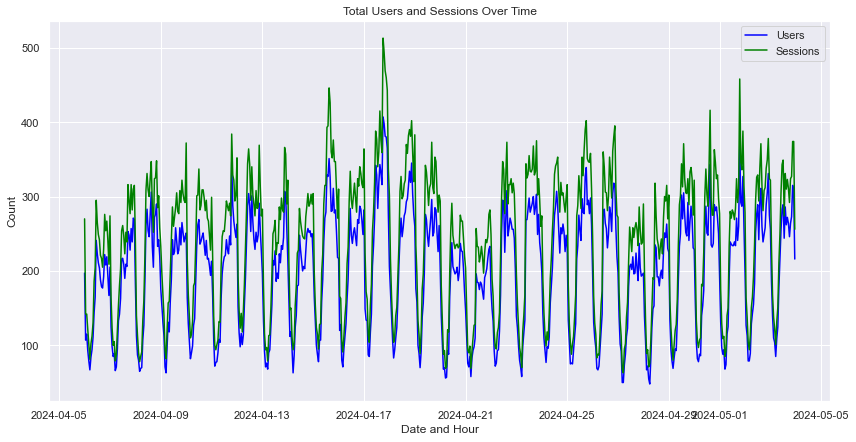

In [21]:
import matplotlib.pyplot as plt

# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
''''From the graph, we can observe there are some fluctuations in the number of users and sessions, 
possibly indicating daily cycles or specific high-traffic periods. Both users and sessions appear 
to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks 
might correspond to specific marketing activities, promotions, or events.

Now that we’ve analyzed the session trends, let’s move on to User Engagement Analysis. We will look into 
metrics like average engagement time per session, engagement rate, and events per session to evaluate how 
engaged users are when they visit the site'''

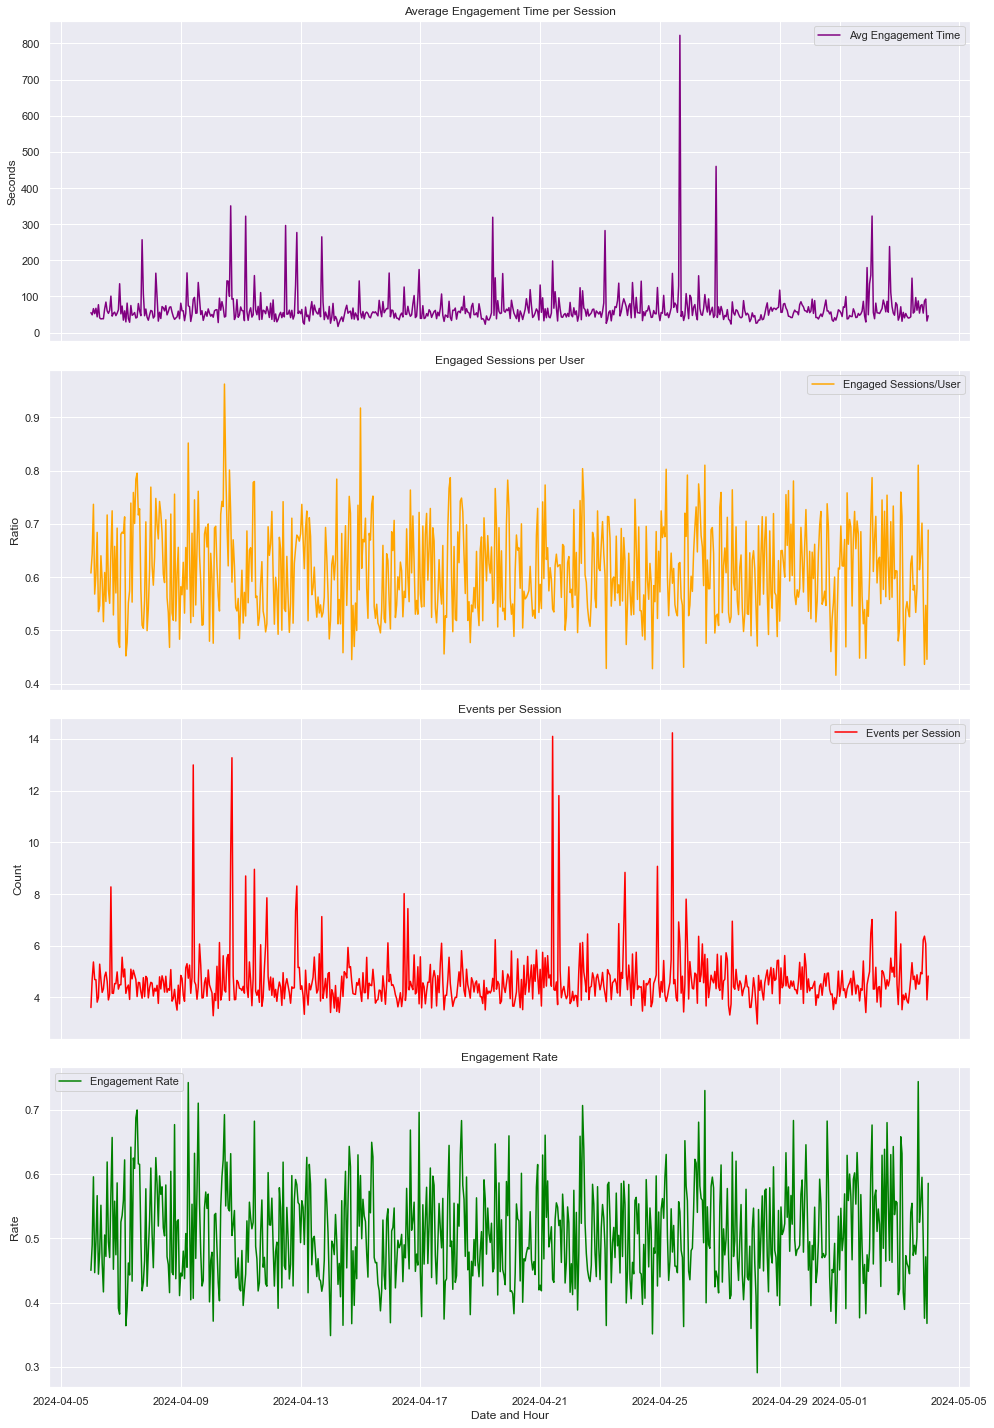

In [22]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')
ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# The user engagement analysis provides insights into how visitors interact with the website:

''''Average Engagement Time per Session: The time spent per session shows fluctuations over the observed period. 
There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific 
content releases or events.

Engaged Sessions per User: This ratio fluctuates slightly but generally indicates that a good portion of sessions 
per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.

Events per Session: The count of events per session remains relatively consistent but does show some variation. 
Peaks here could indicate more interactive content or features being used by visitors.

Engagement Rate: The engagement rate over time shows how many sessions are considered engaged out of the total. 
There are some ups and downs which may relate to how different content resonates with users or how effective certain 
user acquisition channels are'''

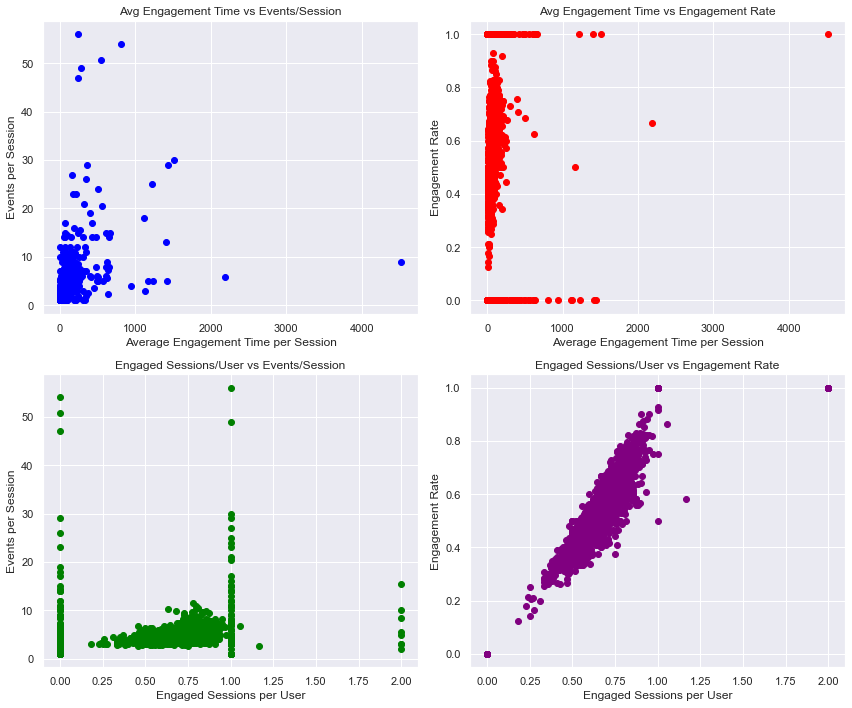

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# we can analyze from the above scatter plots:

''''Average Engagement Time vs Events per Session: There appears to be a concentration of data points at lower average engagement 
times with a wide range of events per session. As the average engagement time increases, the number of events per session 
tends to cluster more narrowly around lower values.

Average Engagement Time vs Engagement Rate: There is a clear trend where sessions with very low engagement times have
a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.

Engaged Sessions per User vs Events per Session: Most data points cluster at lower values for both metrics, with few 
users having a high number of engaged sessions or events per session.

Engaged Sessions per User vs Engagement Rate: There is a strong positive correlation between engaged sessions per user 
and engagement rate, especially noticeable at higher values of engaged sessions per user.

We proceed with the channel performance Analysis to assess how different marketing channels contribute to traffic and engagement. 
It will involve analyzing the session, user, and engagement data segmented by the marketing channel

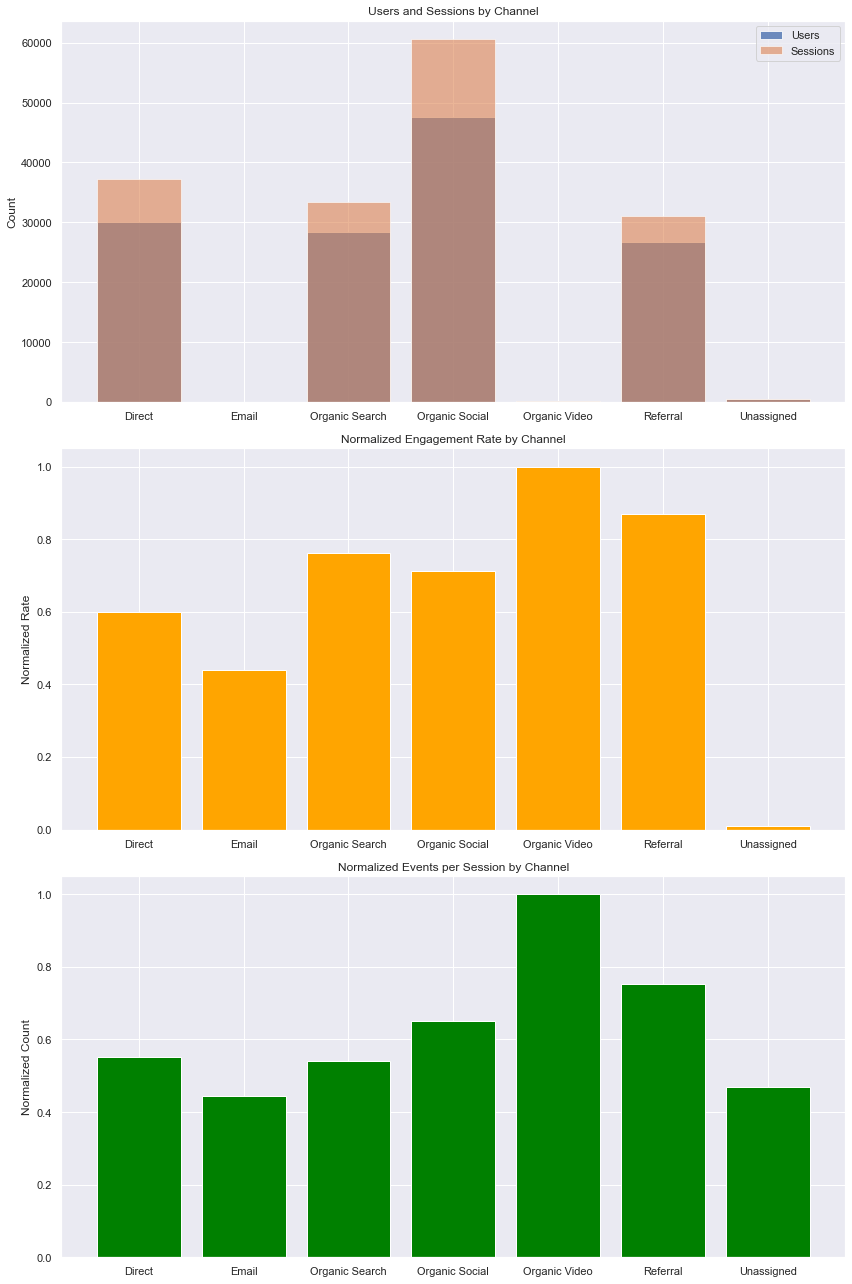

In [24]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

In [ ]:
''''The data illustrates significant variations in performance across different channels, highlighting the 
strengths and weaknesses of each in driving traffic, engaging users, and encouraging interactions. The high performance 
of ‘Organic Search’ in driving traffic contrasts with its lower relative engagement and events metrics, suggesting quantity 
over quality of visits. In contrast, ‘Referral’ and ‘Organic Video’ channels, while not leading in volume, excel in engaging
users deeply, pointing to potential areas for leveraging 
these strengths in marketing strategies'''

# Forecasting Website Traffic

In [ ]:
''''we can forecast the website traffic for the next 24 hours. It will involve creating a time series model 
to forecast future values based on the observed session data. Let’s start this by plotting the autocorrelation 
and partial autocorrelation plots of our time series data, which is typically done to help identify the order of 
an autoregressive integrated moving average for time series models for forecasting'''

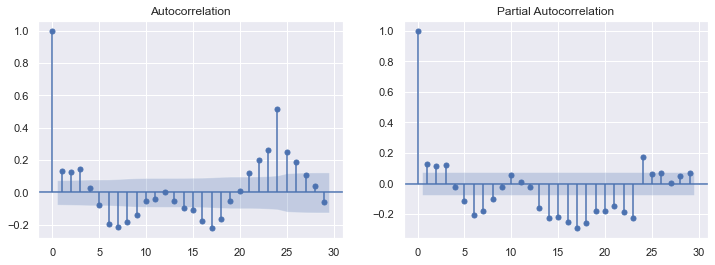

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [ ]:
''''PACF (Partial Autocorrelation Function): This plot helps determine the p parameter for the AR part of the model. 
You look for the lag after which most partial autocorrelations are not significantly different from zero. In our 
plot, the PACF shows a significant spike at lag 1 and then cuts off, suggesting an AR part of order 1. Therefore, p=1.

ACF (Autocorrelation Function): This plot helps identify the q parameter for the MA part of the model. You look for 
the lag after which most autocorrelations are not significantly different from zero. The ACF plot in our case tails 
off gradually, but considering the first significant spike is essential. Since the spike at lag 1 is significant and 
there’s a gradual tailing off rather than a sharp cut-off, it suggests a potential MA component. However, the tailing-off 
nature complicates the exact determination of q, but a starting point of q=1 could be considered.

In [ ]:
''''The other parameter is d, representing seasonality. In our case, as seasonality exists, we can choose the 
value of d as 1. Now, here’s how we can forecast the website’s traffic for the next 24 hours using the SARIMA model

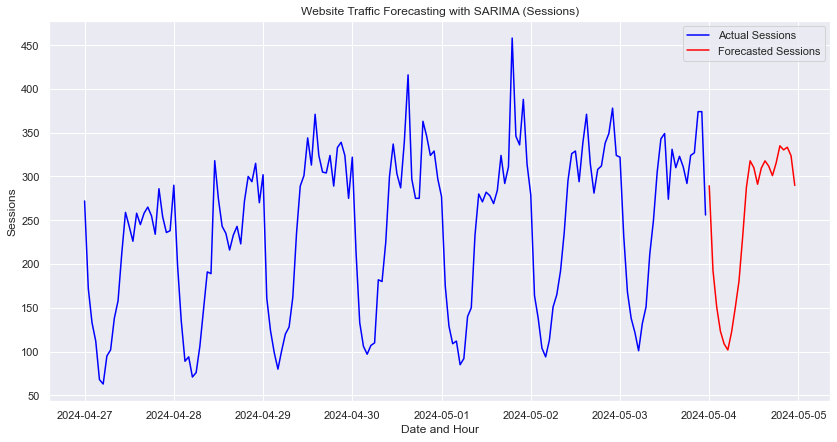

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)
# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()